In [2]:
import os
import pandas as pd

ROOT_DIR = "/home/love/Documents/TradingGym/trading_gym"
data_path = ROOT_DIR + "/data/reliance.csv"

## Download data if not present

In [3]:
if not os.path.exists(data_path):
    import yfinance as yf
    # Ticker of reliance industries
    ticker = yf.Ticker("RELIANCE.NS")
    df = ticker.history(
        # period="max",
        period="2y",
        interval="1d",
    )
    df.to_csv(data_path)
else:
    df = pd.read_csv(data_path, index_col=0, parse_dates=True)

In [4]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-03-24 00:00:00+05:30,2066.858301,2066.858301,2027.752244,2034.609497,7763726,0.0,0.0
2021-03-25 00:00:00+05:30,2041.268038,2041.268038,1972.695743,1979.105713,10153757,0.0,0.0
2021-03-26 00:00:00+05:30,1999.528318,2001.217732,1961.465678,1982.285889,9313160,0.0,0.0
2021-03-30 00:00:00+05:30,1995.553053,2036.199430,1979.205069,2016.721069,9433842,0.0,0.0
2021-03-31 00:00:00+05:30,2005.491013,2037.193177,1986.608789,1990.683350,7499740,0.0,0.0


In [5]:
df = df.drop(columns=["Dividends", "Stock Splits"])

In [6]:
from trading_gym.envs.stock import StocksEnv
env = StocksEnv(df=df, window_size=10)

In [7]:
env.df.head()

,Open,High,Low,Close,Volume,SMA,EMA,RSI
Date,,,,,,,,
2021-04-26 00:00:00+05:30,1908.098561,1949.838217,1899.651250,1925.837891,9620785,1954.091669,1946.221319,47.469102
2021-04-27 00:00:00+05:30,1927.974540,1984.819926,1926.235388,1976.322998,9226547,1951.177344,1949.088145,63.908647
2021-04-28 00:00:00+05:30,1985.465952,1995.553059,1967.875717,1984.919434,7902002,1951.468030,1952.500649,65.999227
2021-04-29 00:00:00+05:30,2010.360766,2031.826851,1994.857490,2011.503662,8035915,1952.928918,1958.119983,71.823083
2021-04-30 00:00:00+05:30,1996.050060,2023.379598,1975.229970,1982.136841,9150974,1951.199707,1960.407303,58.952338


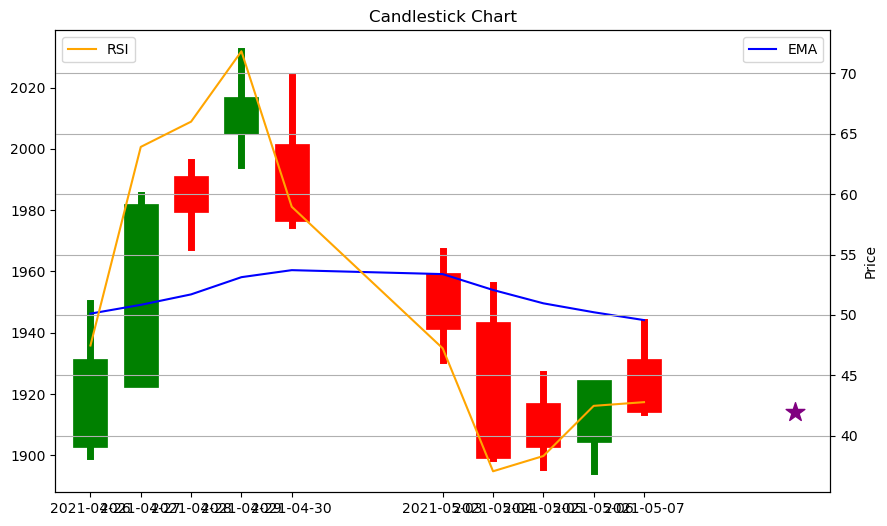

In [9]:
env.render()